<a href="https://colab.research.google.com/github/devanshi311/ML/blob/main/ML_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
print("hello")

hello


In [ ]:
!pip install pandas matplotlib scikit-learn


#1. Prepare decision tree classifier in python using sklearn library for data set diabetes.csv - (pregnant, glucose, bp, skin, insulin, bmi, pedigree, age, label). Use all features except label as independent variable. Use complete dataset for training and limit the depth of tree upto 3 levels and plot using tree.plotTree()method.

Saving Diabetes.csv to Diabetes (10).csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


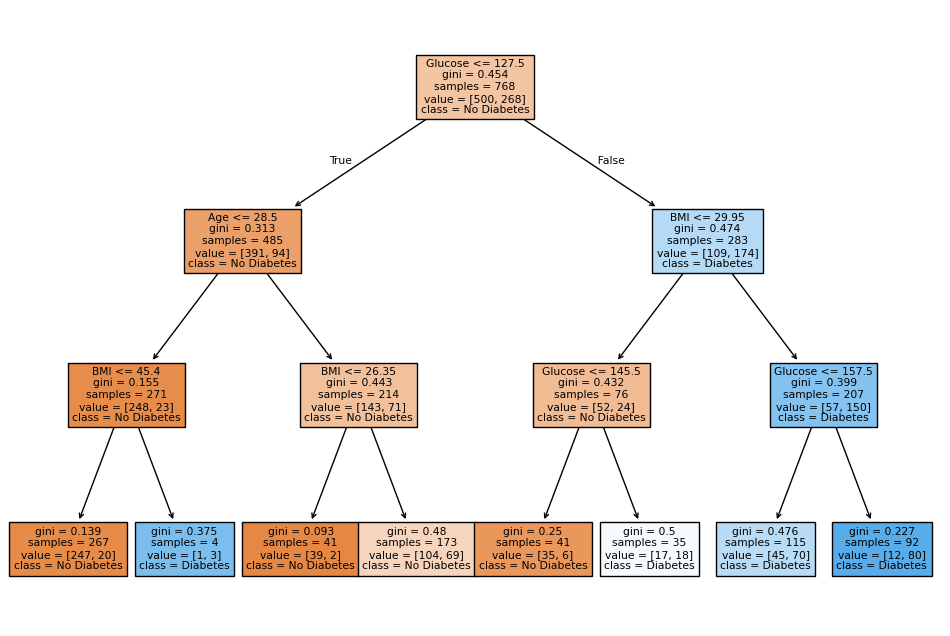

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Get the filename dynamically
filename = list(uploaded.keys())[0]  # Fetch the uploaded file name

# Load dataset
df = pd.read_csv(filename)

# Display first few rows to verify correct loading
print(df.head())

# Check if 'Outcome' column exists
if 'Outcome' not in df.columns:
    raise ValueError("The dataset does not contain an 'Outcome' column. Please check the file format.")

# Separate features and target variable
X = df.drop(columns=["Outcome"])  # All columns except 'Outcome' (target)
y = df["Outcome"]  # Target variable

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


# 2. Using the diabetes dataset, implement a Decision Tree Classifier and determine the importance of each feature in predicting diabetes. Generate different plots to justify your model.

Saving Diabetes.csv to Diabetes (11).csv


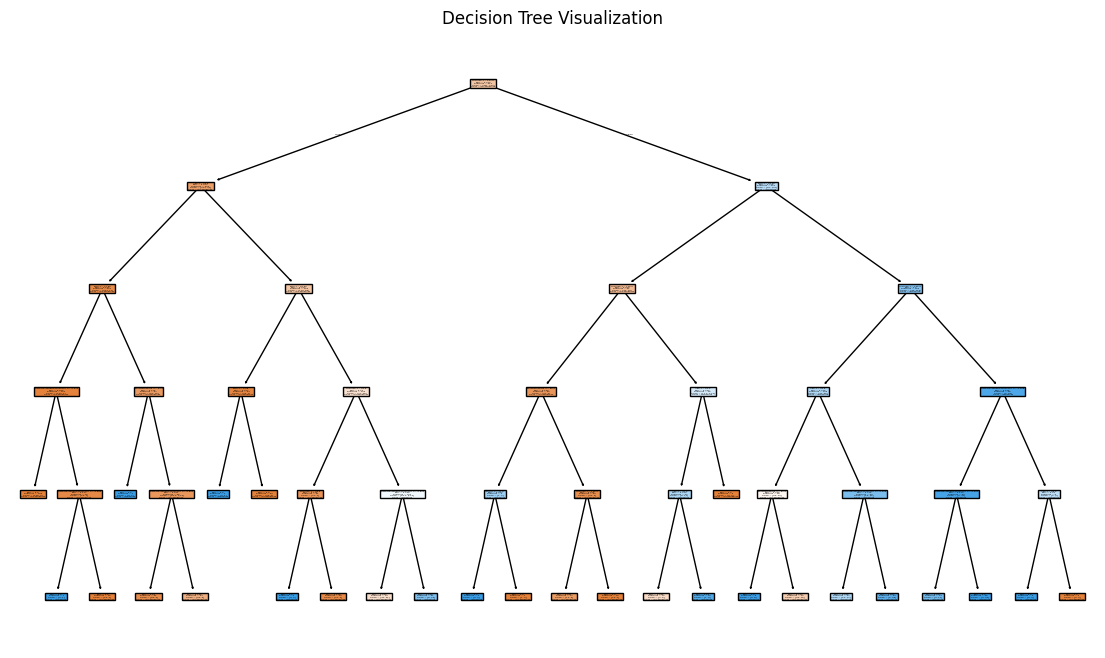

<ipython-input-63-ef9fd79d1279>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


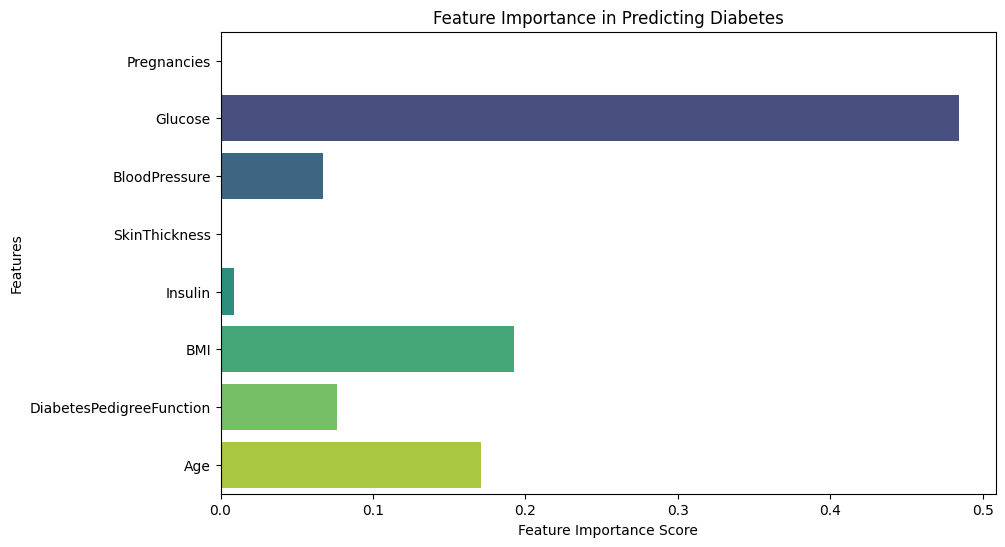

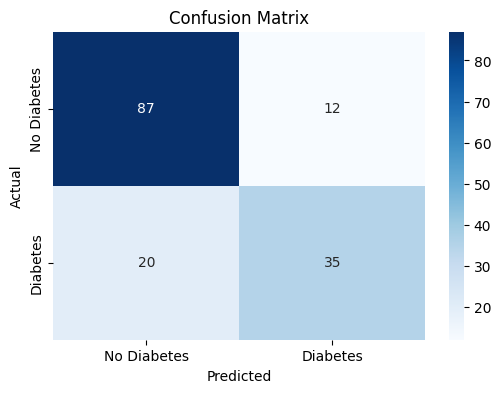

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



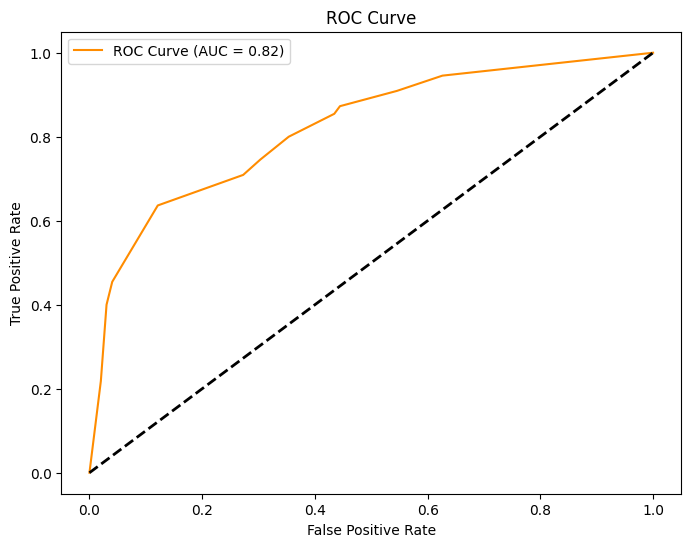

In [63]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from google.colab import files  # For uploading files in Colab

# Upload the dataset file
uploaded = files.upload()

# Get the filename dynamically
filename = list(uploaded.keys())[0]  # Fetch the uploaded file name

# Load dataset
df = pd.read_csv(filename)

# Separate features and target variable
X = df.drop(columns=["Outcome"])  # Independent variables
y = df["Outcome"]  # Dependent variable

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # You can tune max_depth
clf.fit(X_train, y_train)

# ---- (1) Plot Decision Tree ----
plt.figure(figsize=(14, 8))
plot_tree(clf, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# ---- (2) Feature Importance Plot ----
feature_importance = clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Diabetes")
plt.show()

# ---- (3) Model Performance: Confusion Matrix ----
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---- (4) ROC Curve ----
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Get probability scores
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



# 3.Implement a Decision Tree Classifier and compare its performance with a SVM Classifier on the iris dataset.Display the accuracy of both models.

Decision Tree Accuracy: 1.0000
SVm  accuracy: 1.0000

Decision Tree Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 svm classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



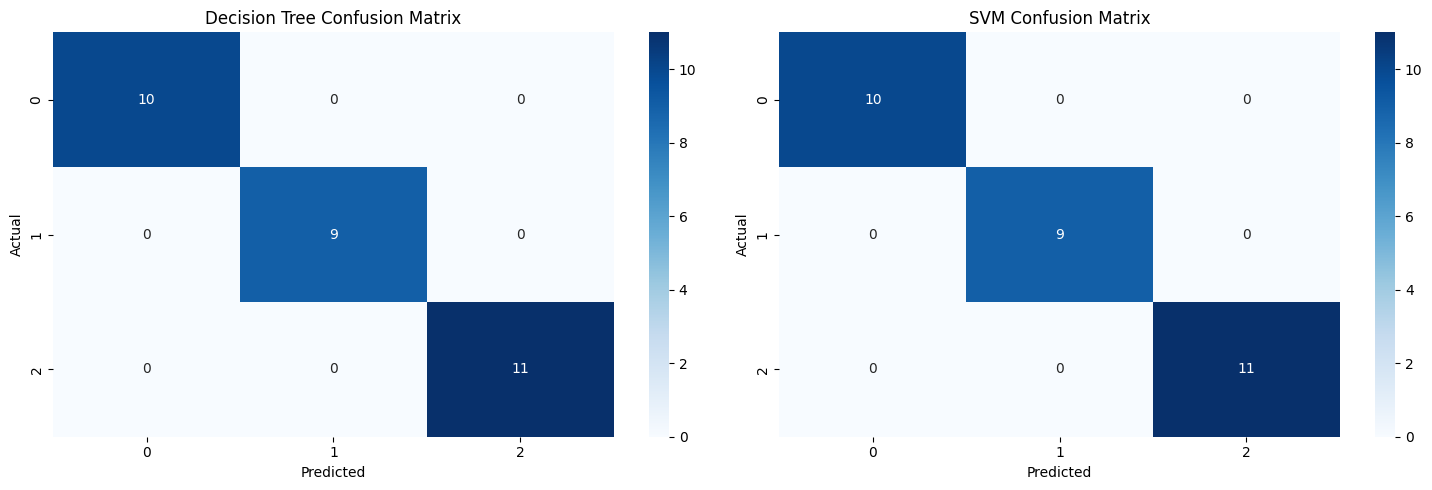

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"SVm  accuracy: {svm_accuracy:.4f}")

print("\nDecision Tree Classification Report:",classification_report(y_test, dt_y_pred))
print("\n svm classification report", classification_report(y_test, svm_y_pred))

fig,axes = plt.subplots(1,2,figsize=(15,5))

sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, svm_y_pred), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()



# 4.Build decision tree classifier for iris data set. One with maximum leaf nodes up to 8 and another one with minimum sample per leaf as 5. Compare accuracy of both models.

Decision Tree Accuracy with max_leaf_nodes=8: 1.0000
Decision Tree Accuracy with min_samples_leaf=5: 1.0000


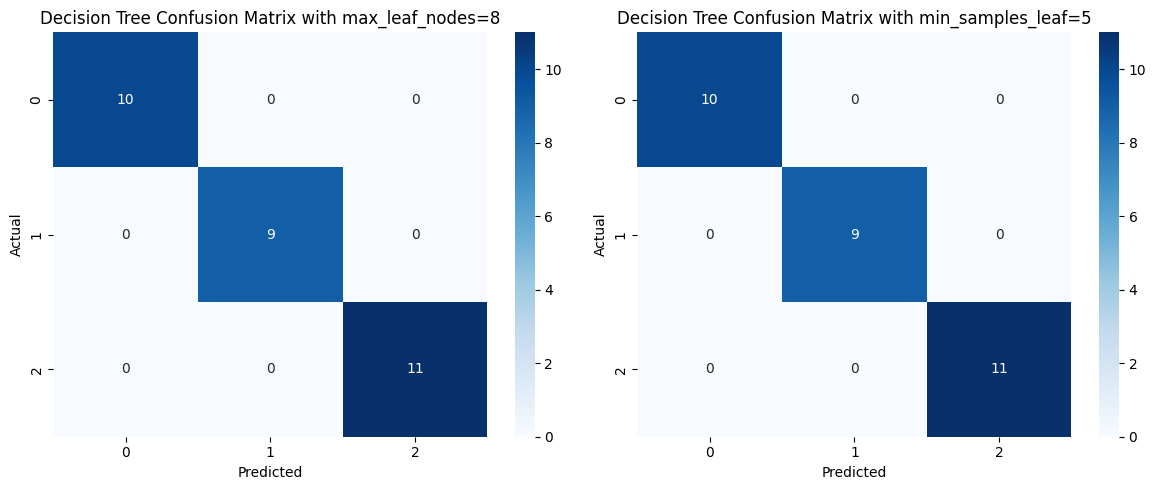

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf_1 = DecisionTreeClassifier(max_leaf_nodes=8, random_state=42)
dt_clf_1.fit(X_train, y_train)
dt_y_pred_1 = dt_clf_1.predict(X_test)

dt_clf_2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
dt_clf_2.fit(X_train, y_train)
dt_y_pred_2 = dt_clf_2.predict(X_test)

dt_accuracy_1 = accuracy_score(y_test, dt_y_pred_1)
dt_accuracy_2 = accuracy_score(y_test, dt_y_pred_2)

print(f"Decision Tree Accuracy with max_leaf_nodes=8: {dt_accuracy_1:.4f}")
print(f"Decision Tree Accuracy with min_samples_leaf=5: {dt_accuracy_2:.4f}")

fig,axes = plt.subplots(1,2,figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, dt_y_pred_1), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix with max_leaf_nodes=8")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, dt_y_pred_2), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix with min_samples_leaf=5")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()



# 5.Implement a Decision Tree Classifier and compare its performance with a Logistic Classifier on the diabetes dataset. Develop Python code to display the accuracy of both models.


Saving Diabetes.csv to Diabetes (8).csv
Decision Tree Accuracy: 0.7922
Logistic Regression Accuracy: 0.7468


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


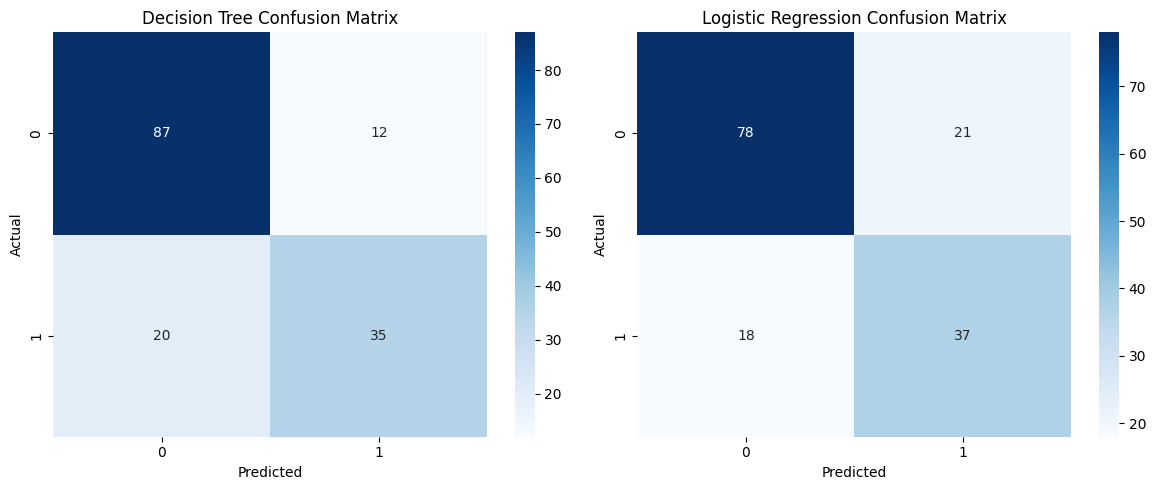

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

# Get the filename dynamically
filename = list(uploaded.keys())[0]  # Fetch the uploaded file name

# Load dataset
df = pd.read_csv(filename)

X= df.drop(columns=["Outcome"])
y= df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

dtc_accuracy = accuracy_score(y_test, dtc_y_pred)
lr_accuracy = accuracy_score(y_test, lr_y_pred)

print(f"Decision Tree Accuracy: {dtc_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, dtc_y_pred), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, lr_y_pred), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# 6.Develop a random dataset using 3 columns and 350 rows. Generate the data frame and apply decision tree classifier to train the model. Compare the accuracy of the model with any 2 other models you can apply on the generated dataset. Generate plot of comparing the accuracy for different models.

   Feature1  Feature2  Feature3  Target
0  0.374540  0.950714  0.731994       0
1  0.598658  0.156019  0.155995       0
2  0.058084  0.866176  0.601115       0
3  0.708073  0.020584  0.969910       1
4  0.832443  0.212339  0.181825       1
Decision Tree Accuracy: 0.4143
Logistic Regression Accuracy: 0.5000
Random Forest Accuracy: 0.5286


<ipython-input-44-9363dbd1755e>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


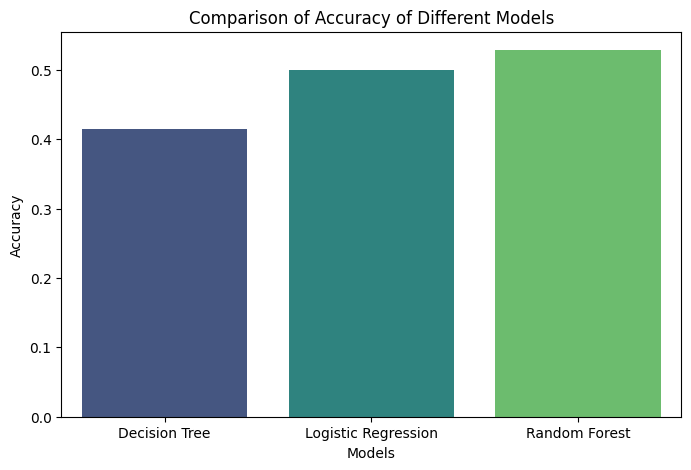

In [44]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
rows,cols = 350,3

X = np.random.rand(rows,cols)
y = np.random.choice([0,1], size=rows)

df = pd.DataFrame(X, columns=[f"Feature{i+1}" for i in range(cols)])
df["Target"] = y

print(df.head())

X_train, X_test, y_train, y_test = train_test_split(df[['Feature1', 'Feature2', 'Feature3']],
                                                    df['Target'], test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_y_pred)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_y_pred)

rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_y_pred)

print(f"Decision Tree Accuracy: {dtc_acc:.4f}")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Random Forest Accuracy: {rfc_acc:.4f}")

models = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [dtc_acc, lr_acc, rfc_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy of Different Models")
plt.show()



# 7.Using the diabetes dataset, implement a Decision Tree Classifier and plot ccp_alpha of built tree against any one DT parameter (node count or maximum depth)

Saving Diabetes.csv to Diabetes (9).csv


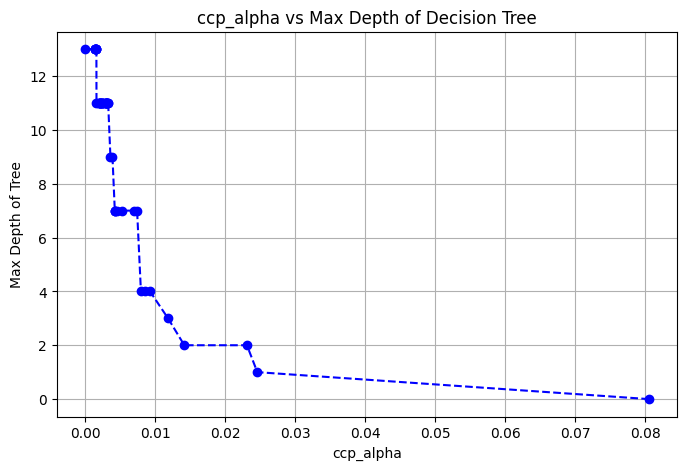

In [45]:

# Upload the dataset file
uploaded = files.upload()

# Get the filename dynamically
filename = list(uploaded.keys())[0]  # Fetch the uploaded file name

# Load dataset
df = pd.read_csv(filename)

X= df.drop(columns=["Outcome"])
y= df["Outcome"]


# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- (1) Train Decision Trees with different ccp_alpha values ----
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities  # Get ccp_alpha values

max_depths = []  # Store tree depth for each alpha value

# Train Decision Trees for each ccp_alpha and record max depth
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    max_depths.append(dt.get_depth())

# ---- (2) Plot ccp_alpha vs. max_depth ----
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, max_depths, marker="o", linestyle="--", color="b")
plt.xlabel("ccp_alpha")
plt.ylabel("Max Depth of Tree")
plt.title("ccp_alpha vs Max Depth of Decision Tree")
plt.grid(True)
plt.show()


# 8.Write a Python script that implements the Elbow Method to determine the optimal number of clusters for a generated dataset. (Generate dataset of your choice with 14 points)

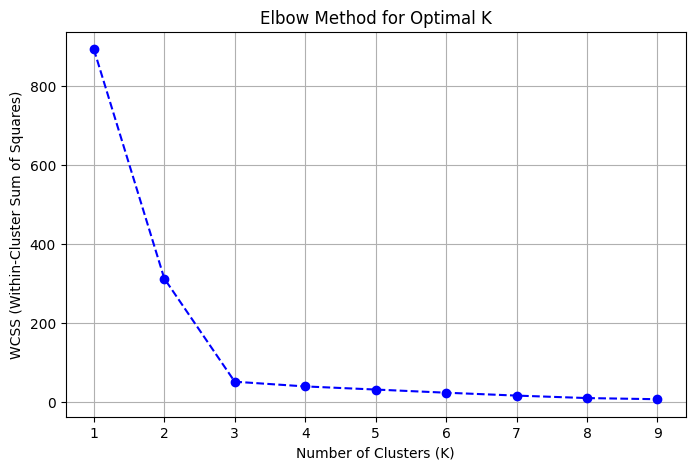

In [49]:

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# ---- (1) Generate a random dataset with 14 points ----
np.random.seed(42)
X, _ = make_blobs(n_samples=14, centers=3, random_state=42, cluster_std=1.5)

# ---- (2) Apply K-Means Clustering with different K values ----
wcss = []  # Store within-cluster sum of squares (WCSS)

# Try different cluster numbers (1 to 10)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Save WCSS for this K

# ---- (3) Plot the Elbow Method graph ----
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

In [51]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00


# 9.Generate a random dataset of urban areas with features such as population density, average income, and amenities, (min. 100 data). Apply K-medoids clustering to identify neighbourhoods with similar characteristics. Visualize the clusters on a map

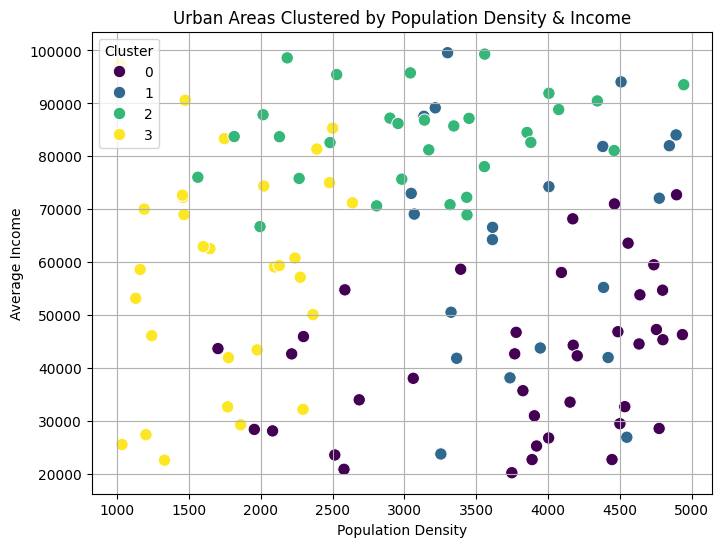

In [52]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

# ---- (1) Generate a random dataset for urban areas ----
np.random.seed(42)
num_samples = 120  # 120 urban areas

# Generate random data: Population Density (1000-5000), Average Income (20k-100k), Amenities (5-50)
population_density = np.random.randint(1000, 5000, num_samples)
average_income = np.random.randint(20000, 100000, num_samples)
num_amenities = np.random.randint(5, 50, num_samples)

# Create a DataFrame
df = pd.DataFrame({
    "Population Density": population_density,
    "Average Income": average_income,
    "Number of Amenities": num_amenities
})

# ---- (2) Normalize the data (important for clustering) ----
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# ---- (3) Apply K-Medoids Clustering ----
best_k = 4  # Choosing 4 clusters based on domain knowledge
kmedoids = KMedoids(n_clusters=best_k, random_state=42)
df["Cluster"] = kmedoids.fit_predict(scaled_features)

# ---- (4) Visualize the Clusters ----
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Population Density"],
    y=df["Average Income"],
    hue=df["Cluster"],
    palette="viridis",
    s=80
)
plt.title("Urban Areas Clustered by Population Density & Income")
plt.xlabel("Population Density")
plt.ylabel("Average Income")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


# 10.Generate a random dataset containing customer information (e.g., age, spending score)(100 rows), apply K-medoids clustering to segment customers into distinct groups. Visualize the clusters and summarize the characteristics of each segment

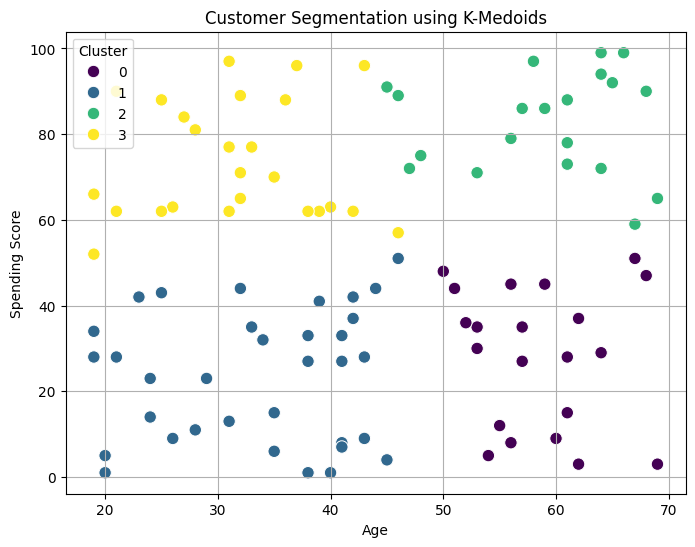


Cluster Characteristics Summary:

           Age         Spending Score        
          mean min max           mean min max
Cluster                                      
0        58.43  50  69          28.19   3  51
1        33.53  19  46          23.50   1  51
2        58.95  45  69          82.75  59  99
3        31.56  19  46          73.68  52  97


In [53]:

# ---- (1) Generate a Random Customer Dataset ----
np.random.seed(42)
num_customers = 100

# Generate random values for Age (18-70) and Spending Score (1-100)
ages = np.random.randint(18, 70, num_customers)
spending_scores = np.random.randint(1, 100, num_customers)

# Create a DataFrame
df = pd.DataFrame({
    "Age": ages,
    "Spending Score": spending_scores
})

# ---- (2) Normalize the Data ----
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# ---- (3) Apply K-Medoids Clustering ----
best_k = 4  # Assuming 4 customer segments
kmedoids = KMedoids(n_clusters=best_k, random_state=42)
df["Cluster"] = kmedoids.fit_predict(scaled_features)

# ---- (4) Visualize the Clusters ----
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Age"],
    y=df["Spending Score"],
    hue=df["Cluster"],
    palette="viridis",
    s=80
)
plt.title("Customer Segmentation using K-Medoids")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# ---- (5) Summarize Cluster Characteristics ----
summary = df.groupby("Cluster").agg({
    "Age": ["mean", "min", "max"],
    "Spending Score": ["mean", "min", "max"],
}).round(2)
print("\nCluster Characteristics Summary:\n")
print(summary)


# 11.You are working with an e-commerce company that wants to segment its customers based on their purchasing behaviour. Generate random dataset that includes features like total spending, frequency of purchases, and average basket size. Develop a Python program to perform K-means clustering. Visualize the clusters and summarize the characteristics of each segment.

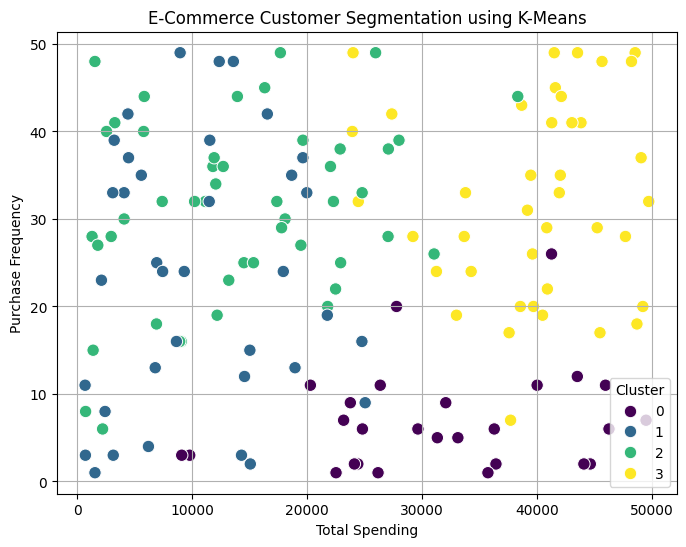


Cluster Characteristics Summary:

        Total Spending               Purchase Frequency          \
                  mean    min    max               mean min max   
Cluster                                                           
0             31546.96   9071  49484               6.93   1  26   
1             10558.58    661  25038              23.61   1  49   
2             14185.02    706  38319              31.09   6  49   
3             39640.80  23919  49716              32.30   7  49   

        Average Basket Size              
                       mean   min   max  
Cluster                                  
0                   3583.33  1782  4880  
1                   1026.97   116  2637  
2                   3870.68  2400  4993  
3                   1859.20   104  4246  


In [54]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ---- (1) Generate a Random Customer Dataset ----
np.random.seed(42)
num_customers = 150  # Number of customers

# Generate synthetic data
total_spending = np.random.randint(500, 50000, num_customers)  # Total spending in ₹
frequency = np.random.randint(1, 50, num_customers)  # Number of purchases
basket_size = np.random.randint(100, 5000, num_customers)  # Avg basket size

# Create DataFrame
df = pd.DataFrame({
    "Total Spending": total_spending,
    "Purchase Frequency": frequency,
    "Average Basket Size": basket_size
})

# ---- (2) Normalize the Data ----
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# ---- (3) Apply K-Means Clustering ----
optimal_k = 4  # Assume 4 customer segments
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# ---- (4) Visualize the Clusters ----
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Total Spending"],
    y=df["Purchase Frequency"],
    hue=df["Cluster"],
    palette="viridis",
    s=80
)
plt.title("E-Commerce Customer Segmentation using K-Means")
plt.xlabel("Total Spending")
plt.ylabel("Purchase Frequency")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# ---- (5) Summarize Cluster Characteristics ----
summary = df.groupby("Cluster").agg({
    "Total Spending": ["mean", "min", "max"],
    "Purchase Frequency": ["mean", "min", "max"],
    "Average Basket Size": ["mean", "min", "max"],
}).round(2)

print("\nCluster Characteristics Summary:\n")
print(summary)


# 12. Use make_blobs to generate 300 samples. Analyse the data and apply KMeans clustering and generate the graph for better representation. Show what happens if you change n_clusters count from 2 to 7(2,3,4,5,6,7)?

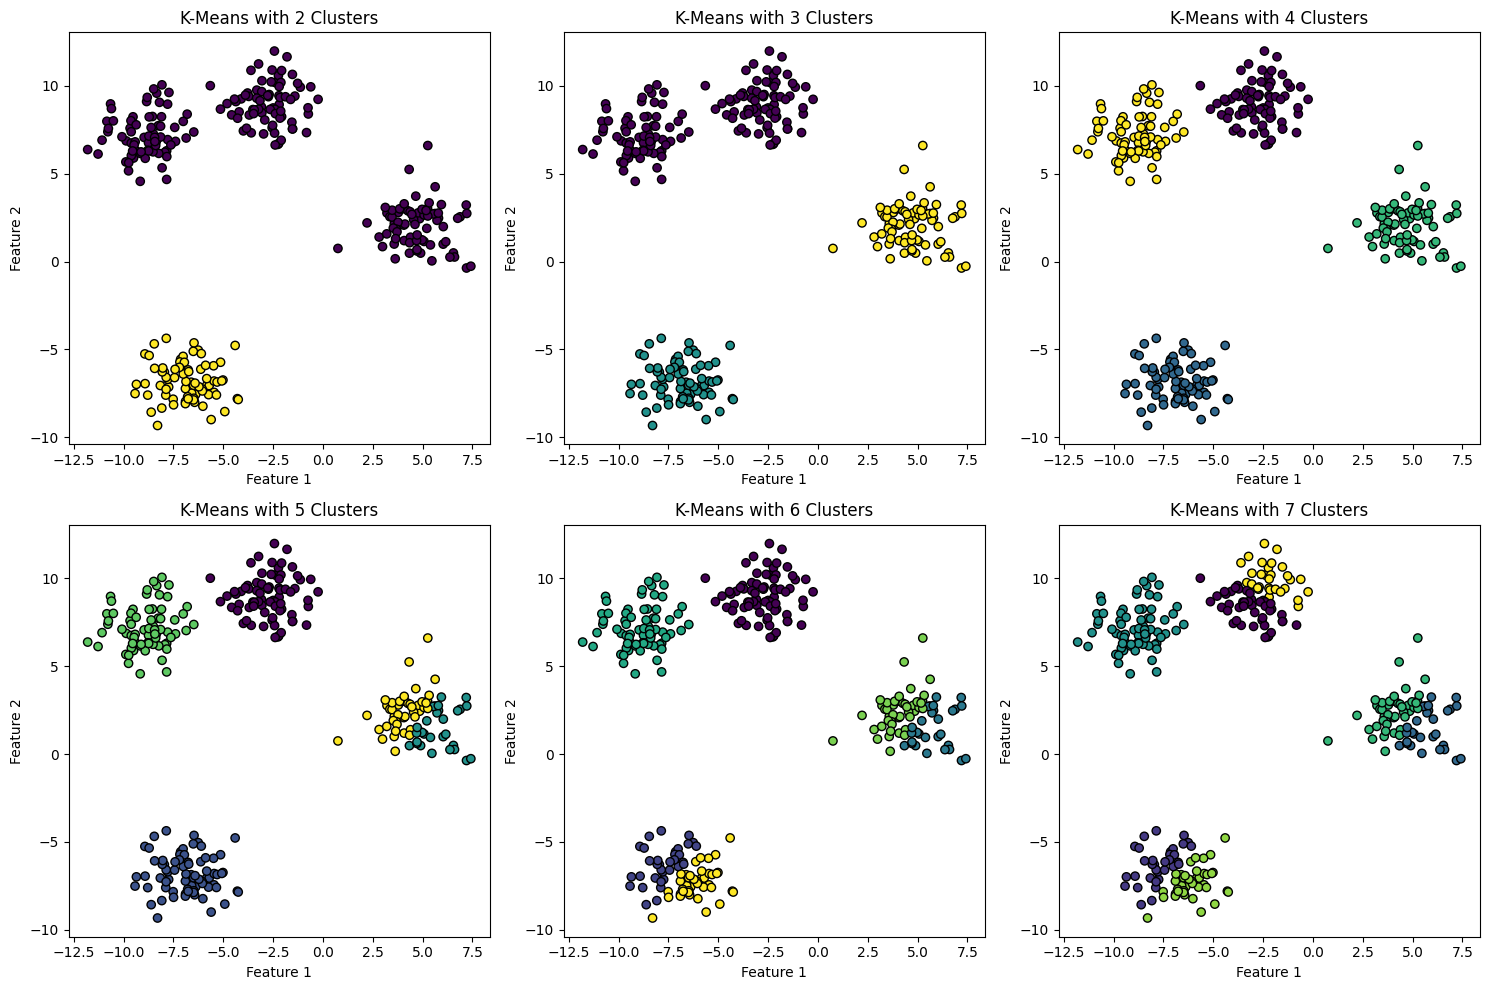

In [55]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# ---- (1) Generate synthetic data using make_blobs ----
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)  # Generate 4 center blobs

# ---- (2) Apply K-Means clustering with different cluster counts ----
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for plots

cluster_counts = [2, 3, 4, 5, 6, 7]  # Testing different cluster sizes

for i, k in enumerate(cluster_counts):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)

    # Plot results
    ax = axes[i // 3, i % 3]  # Arrange plots in grid
    scatter = ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", edgecolor="k")
    ax.set_title(f"K-Means with {k} Clusters")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


# 13. A grocery store wants to analyze customer purchase patterns to improve product placements. Generate random transaction data (products purchased together), apply K-means clustering to group similar transactions

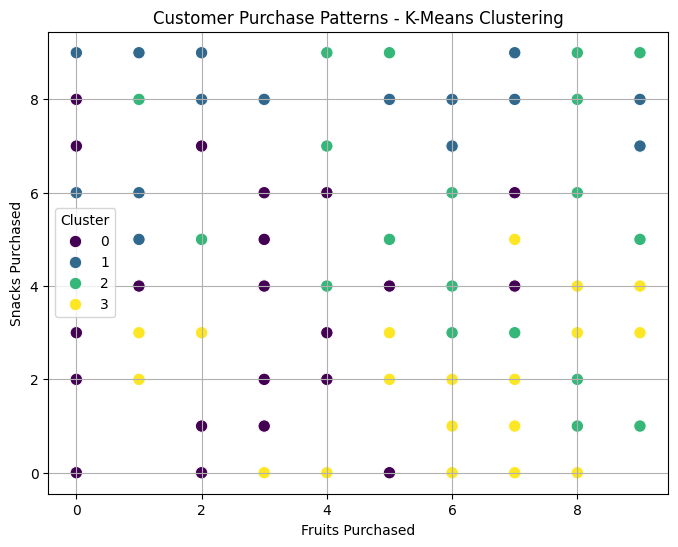


Cluster Characteristics Summary:

        Fruits         Vegetables         Dairy         Snacks          \
          mean min max       mean min max  mean min max   mean min max   
Cluster                                                                  
0         2.43   0   7       1.81   0   6  6.76   0   9   3.90   0   9   
1         4.48   0   9       6.35   2   9  5.68   2   9   7.55   4   9   
2         6.49   1   9       2.05   0   7  2.31   0   9   5.74   1   9   
3         6.00   1   9       5.87   2   9  3.74   0   9   1.74   0   5   

        Beverages          
             mean min max  
Cluster                    
0            4.29   0   9  
1            3.74   0   9  
2            5.64   0   9  
3            2.79   0   8  


In [56]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ---- (1) Generate Random Transaction Data ----
np.random.seed(42)
num_customers = 150  # Number of transactions

# Simulating purchase patterns for different product categories
fruits = np.random.randint(0, 10, num_customers)   # Fruits purchased
vegetables = np.random.randint(0, 10, num_customers) # Vegetables purchased
dairy = np.random.randint(0, 10, num_customers)     # Dairy items purchased
snacks = np.random.randint(0, 10, num_customers)    # Snacks purchased
beverages = np.random.randint(0, 10, num_customers) # Beverages purchased

# Create DataFrame
df = pd.DataFrame({
    "Fruits": fruits,
    "Vegetables": vegetables,
    "Dairy": dairy,
    "Snacks": snacks,
    "Beverages": beverages
})

# ---- (2) Normalize the Data ----
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# ---- (3) Apply K-Means Clustering ----
optimal_k = 4  # Assume 4 customer segments
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# ---- (4) Visualize the Clusters ----
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Fruits"],
    y=df["Snacks"],
    hue=df["Cluster"],
    palette="viridis",
    s=80
)
plt.title("Customer Purchase Patterns - K-Means Clustering")
plt.xlabel("Fruits Purchased")
plt.ylabel("Snacks Purchased")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# ---- (5) Summarize Cluster Characteristics ----
summary = df.groupby("Cluster").agg({
    "Fruits": ["mean", "min", "max"],
    "Vegetables": ["mean", "min", "max"],
    "Dairy": ["mean", "min", "max"],
    "Snacks": ["mean", "min", "max"],
    "Beverages": ["mean", "min", "max"]
}).round(2)

print("\nCluster Characteristics Summary:\n")
print(summary)


# 14. Generate random dataset with 35 points. Apply KMeans clustering and generate the plot with each cluster points with different colours. What is the impact of varying cluster count? Justify your understanding with suitable graphs

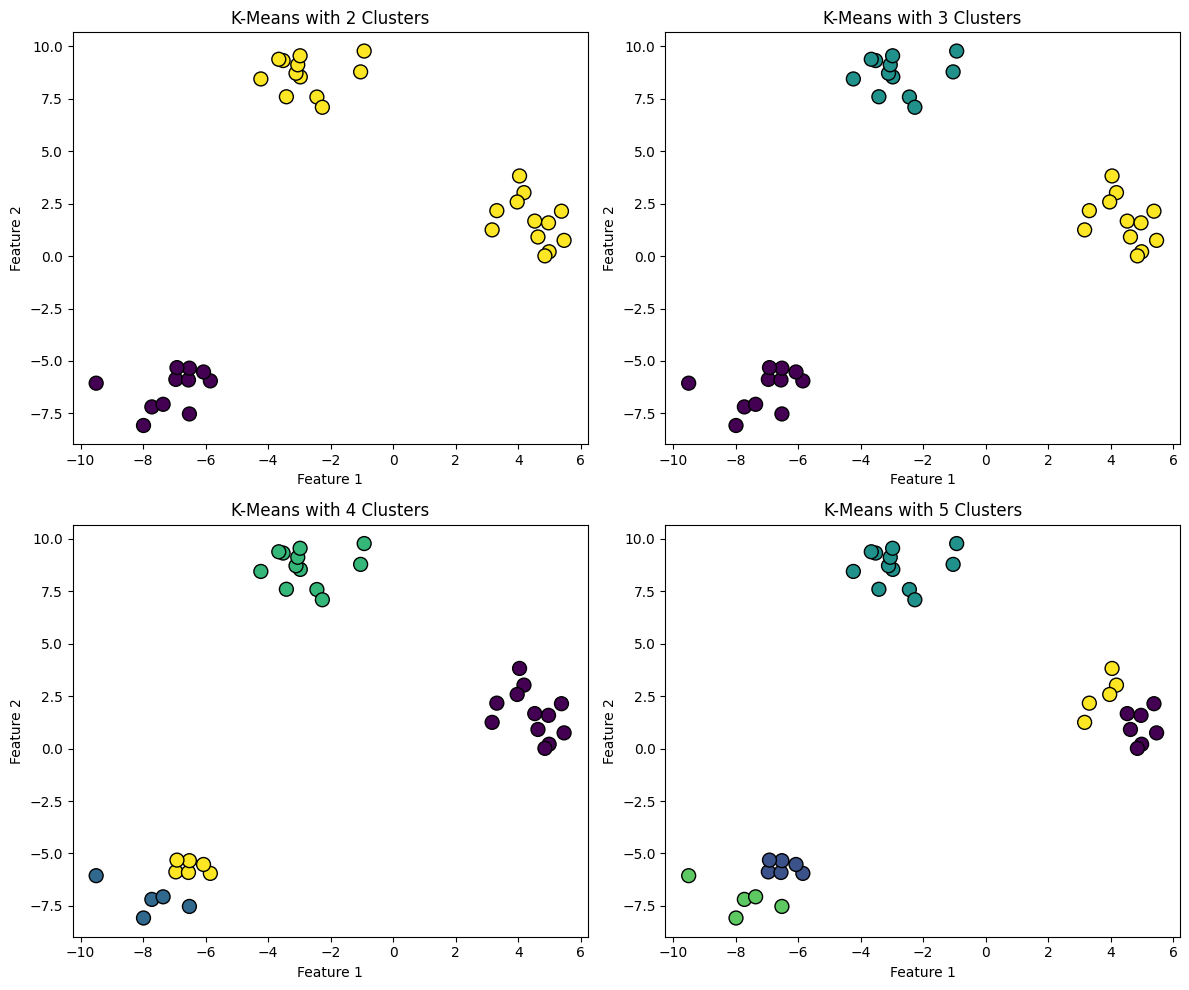

In [57]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# ---- (1) Generate Random Dataset (35 Points) ----
np.random.seed(42)
X, _ = make_blobs(n_samples=35, centers=3, cluster_std=1.0, random_state=42)

# ---- (2) Apply K-Means with Varying Cluster Counts ----
cluster_counts = [2, 3, 4, 5]  # Testing different values of k

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns for plots

for i, k in enumerate(cluster_counts):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)

    # Plot results
    ax = axes[i // 2, i % 2]  # Arrange plots in a grid
    scatter = ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", edgecolor="k", s=100)
    ax.set_title(f"K-Means with {k} Clusters")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


# 15. Develop a Python program to implement DBSCAN using the sklearn library. Use a 2D dataset (ex.make_moons) for clustering.

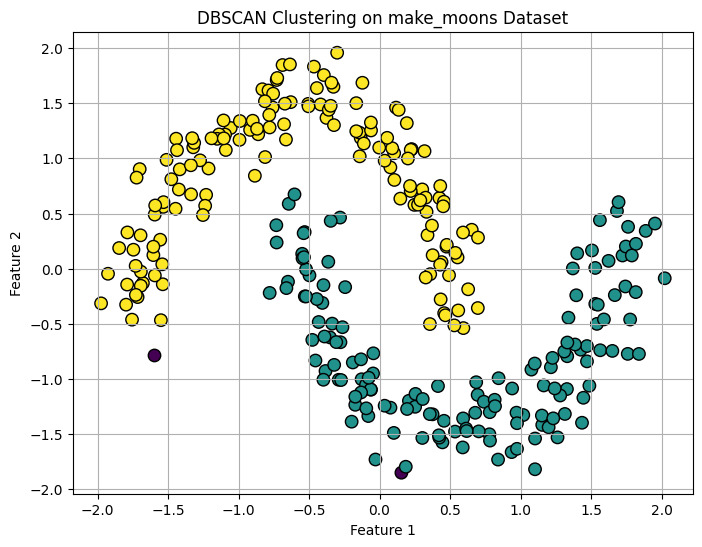

In [58]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# ---- (1) Generate a Non-Linearly Separable Dataset (make_moons) ----
np.random.seed(42)
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)  # 300 points with some noise

# ---- (2) Normalize Data ----
X = StandardScaler().fit_transform(X)

# ---- (3) Apply DBSCAN ----
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust parameters for best clustering
clusters = dbscan.fit_predict(X)

# ---- (4) Visualize the Clusters ----
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", edgecolor="k", s=80)
plt.title("DBSCAN Clustering on make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


# 16. Generate a random dataset with 5 columns and use 3rd and 4th column as data to implement DBSCAN.Consider eps=5 and minPts=5.

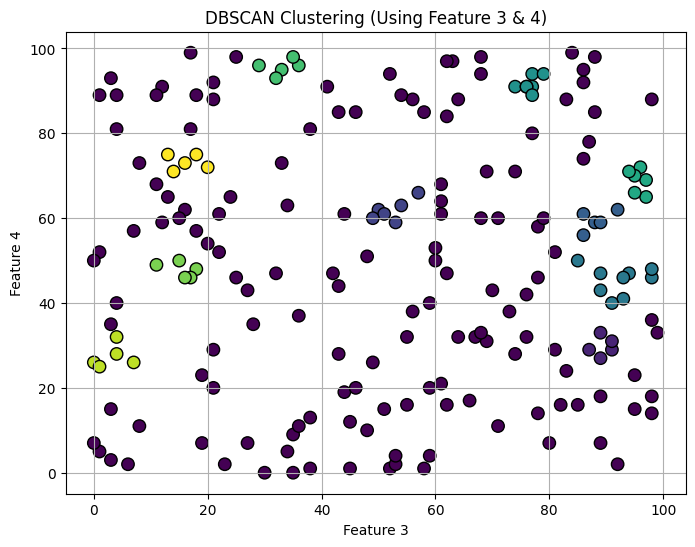

In [59]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# ---- (1) Generate a Random Dataset with 5 Columns ----
np.random.seed(42)
num_samples = 200  # Number of rows

data = np.random.randint(0, 100, size=(num_samples, 5))  # 200 rows, 5 features
df = pd.DataFrame(data, columns=["Feature_1", "Feature_2", "Feature_3", "Feature_4", "Feature_5"])

# ---- (2) Select 3rd & 4th Columns as Features for DBSCAN ----
X = df.iloc[:, [2, 3]].values  # Feature_3 & Feature_4

# ---- (3) Apply DBSCAN ----
dbscan = DBSCAN(eps=5, min_samples=5)  # Parameters: eps=5, minPts=5
clusters = dbscan.fit_predict(X)

# ---- (4) Visualize the Clusters ----
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", edgecolor="k", s=80)
plt.title("DBSCAN Clustering (Using Feature 3 & 4)")
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.grid(True)
plt.show()


# **17. Use DBSCAN to cluster customers based on their purchasing behaviour (ex. frequency of purchases, average transaction amount)(Generate random dataset with min. 100 customers). Develop a program that analyses the clusters to identify different customer segments for targeted marketing
**

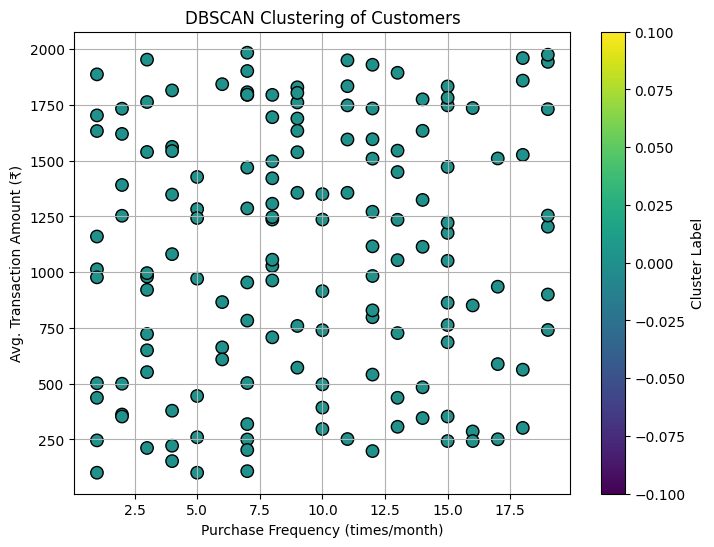


Customer Segmentation Summary:

        Purchase_Frequency         Avg_Transaction_Amount             \
                      mean min max                   mean  min   max   
Cluster                                                                
0                     9.35   1  19                1097.14  101  1984   

        Customer_Count  
                 count  
Cluster                 
0                  150  


In [60]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# ---- (1) Generate Random Customer Data ----
np.random.seed(42)
num_customers = 150  # Number of customers

# Features: Frequency of purchases & Average transaction amount
purchase_frequency = np.random.randint(1, 20, num_customers)  # Purchases per month
avg_transaction_amount = np.random.randint(100, 2000, num_customers)  # ₹ spent per transaction

# Create DataFrame
df = pd.DataFrame({
    "Customer_ID": range(1, num_customers + 1),
    "Purchase_Frequency": purchase_frequency,
    "Avg_Transaction_Amount": avg_transaction_amount
})

# ---- (2) Normalize Data ----
X = df.iloc[:, 1:].values  # Select numerical columns for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- (3) Apply DBSCAN ----
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Adjust eps for best clustering
df["Cluster"] = dbscan.fit_predict(X_scaled)

# ---- (4) Visualize the Clusters ----
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Purchase_Frequency"], df["Avg_Transaction_Amount"],
                      c=df["Cluster"], cmap="viridis", edgecolor="k", s=80)
plt.title("DBSCAN Clustering of Customers")
plt.xlabel("Purchase Frequency (times/month)")
plt.ylabel("Avg. Transaction Amount (₹)")
plt.colorbar(scatter, label="Cluster Label")
plt.grid(True)
plt.show()

# ---- (5) Analyze Customer Segments ----
print("\nCustomer Segmentation Summary:\n")
cluster_summary = df.groupby("Cluster").agg({
    "Purchase_Frequency": ["mean", "min", "max"],
    "Avg_Transaction_Amount": ["mean", "min", "max"],
    "Customer_ID": "count"
}).rename(columns={"Customer_ID": "Customer_Count"}).round(2)

print(cluster_summary)


# 18.Generate a data frame containing two features(Spending,features) for 100 data. Apply DBSCAN and do parametric analysis for eps value and show the impact on the performance of model via graph.

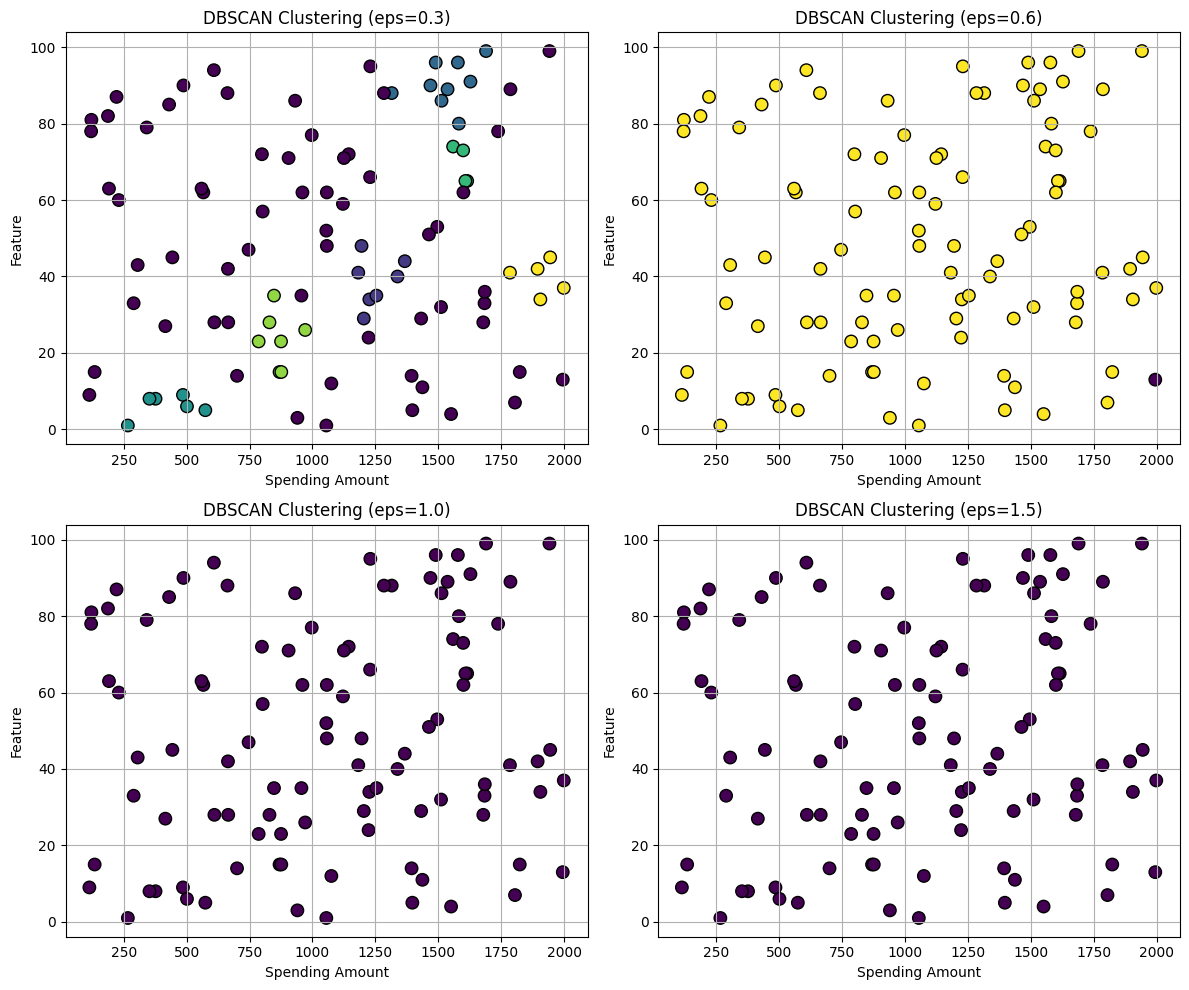


Cluster Distribution for Different Eps Values:

Eps = 0.3
 Cluster_eps_0.3
-1    62
 1     9
 0     7
 4     7
 2     6
 5     5
 3     4
Name: count, dtype: int64

Eps = 0.6
 Cluster_eps_0.6
 0    99
-1     1
Name: count, dtype: int64

Eps = 1.0
 Cluster_eps_1.0
0    100
Name: count, dtype: int64

Eps = 1.5
 Cluster_eps_1.5
0    100
Name: count, dtype: int64


In [64]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# ---- (1) Generate Random Data ----
np.random.seed(42)
num_samples = 100

# Features: Spending & Some Other Feature
spending = np.random.randint(100, 2000, num_samples)  # Spending amount
feature = np.random.randint(1, 100, num_samples)  # Some other feature

# Create DataFrame
df = pd.DataFrame({"Spending": spending, "Feature": feature})

# ---- (2) Normalize Data ----
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- (3) Apply DBSCAN with Different Eps Values ----
eps_values = [0.3, 0.6, 1.0, 1.5]  # Different eps values for analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)  # Fixed min_samples = 5
    clusters = dbscan.fit_predict(X_scaled)
    df[f"Cluster_eps_{eps}"] = clusters

    # Plot results
    ax = axes[i // 2, i % 2]  # Arrange plots in 2x2 grid
    scatter = ax.scatter(df["Spending"], df["Feature"], c=clusters, cmap="viridis", edgecolor="k", s=80)
    ax.set_title(f"DBSCAN Clustering (eps={eps})")
    ax.set_xlabel("Spending Amount")
    ax.set_ylabel("Feature")
    ax.grid(True)

plt.tight_layout()
plt.show()

# ---- (4) Print Cluster Distribution for Analysis ----
print("\nCluster Distribution for Different Eps Values:")
for eps in eps_values:
    cluster_counts = df[f"Cluster_eps_{eps}"].value_counts()
    print(f"\nEps = {eps}\n", cluster_counts)


# 19. Generate a random dataset with 4 columns and use 1st and 3rd column as data to implement DBSCAN.What if eps is changed from 1 to 5? How it will affect the performance of the model? What is the impact of minPts on the performance of the model? Justify it with graph by changing minPts.

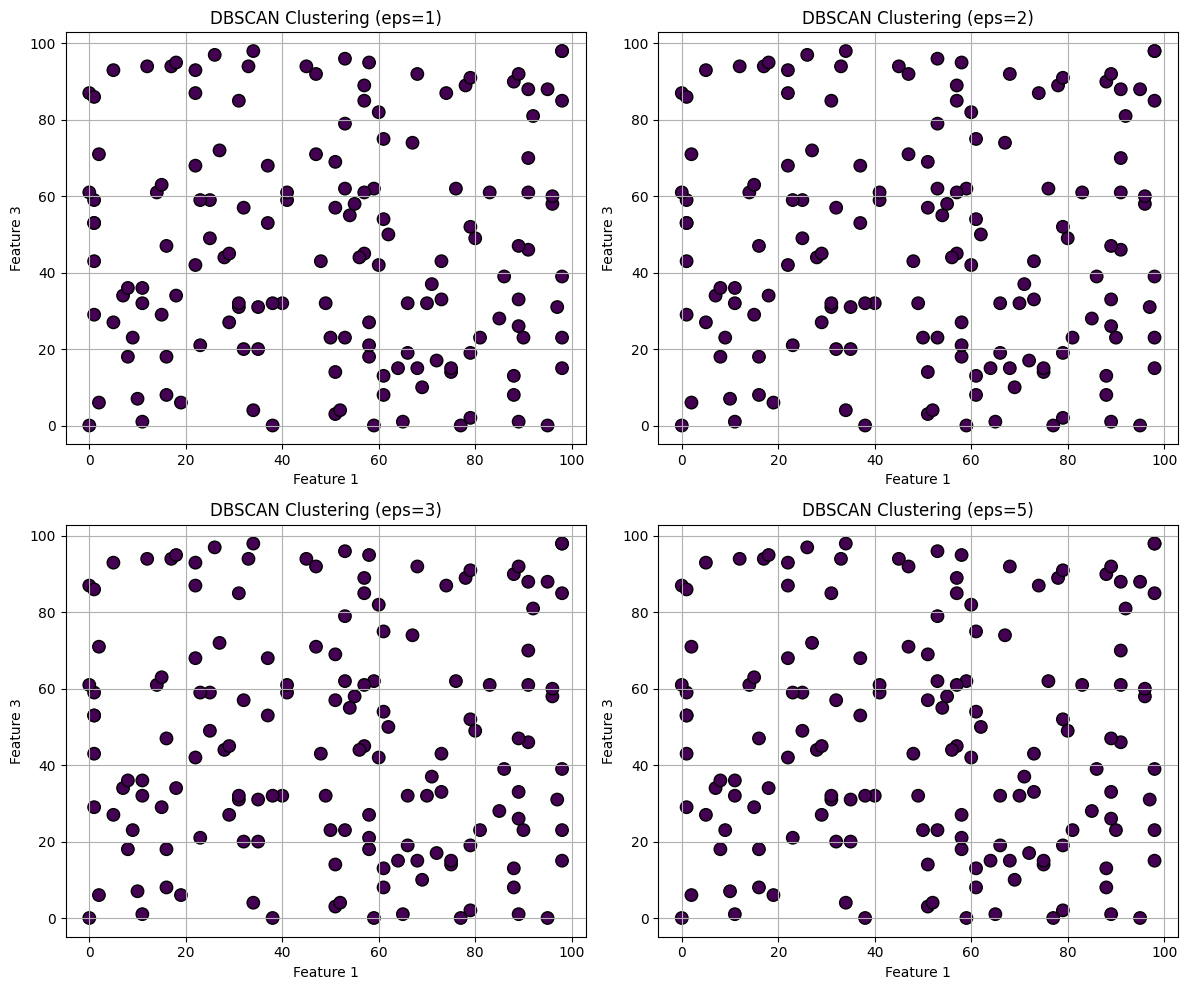

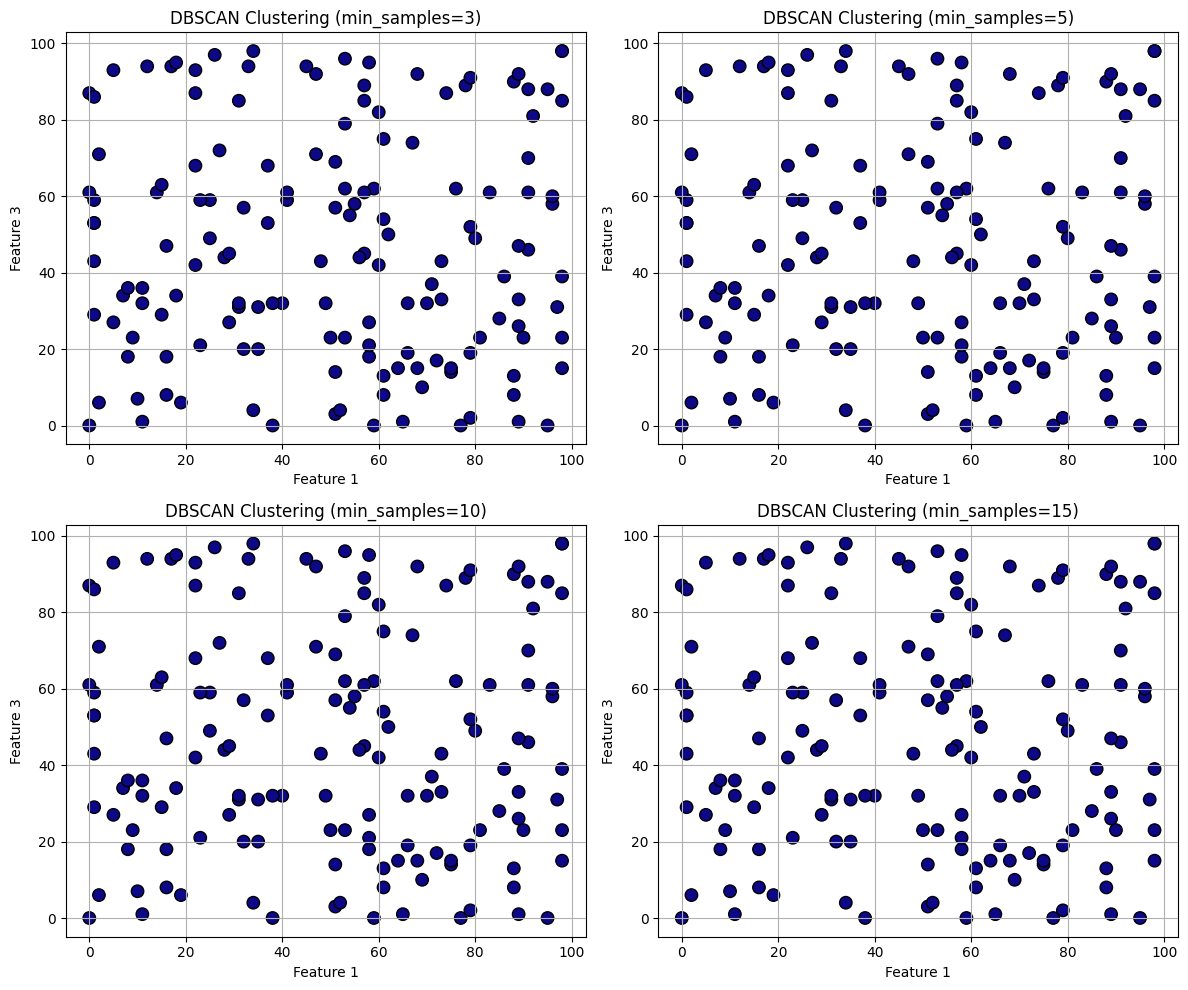

In [65]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# ---- (1) Generate Random Data ----
np.random.seed(42)
num_samples = 150

# Generate a dataset with 4 columns
data = np.random.randint(0, 100, size=(num_samples, 4))
df = pd.DataFrame(data, columns=["Feature_1", "Feature_2", "Feature_3", "Feature_4"])

# Use 1st and 3rd column for DBSCAN
X = df.iloc[:, [0, 2]].values  # Selecting Feature_1 and Feature_3

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- (2) DBSCAN with Different `eps` Values ----
eps_values = [1, 2, 3, 5]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X_scaled)

    # Plot clustering results
    ax = axes[i // 2, i % 2]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", edgecolor="k", s=80)
    ax.set_title(f"DBSCAN Clustering (eps={eps})")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 3")
    ax.grid(True)

plt.tight_layout()
plt.show()

# ---- (3) DBSCAN with Different `min_samples` Values ----
min_samples_values = [3, 5, 10, 15]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, min_samples in enumerate(min_samples_values):
    dbscan = DBSCAN(eps=2, min_samples=min_samples)  # Keeping eps=2 constant
    clusters = dbscan.fit_predict(X_scaled)

    # Plot clustering results
    ax = axes[i // 2, i % 2]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma", edgecolor="k", s=80)
    ax.set_title(f"DBSCAN Clustering (min_samples={min_samples})")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 3")
    ax.grid(True)

plt.tight_layout()
plt.show()


# 20. Generate random dataset for mall_customer dataset with features like Customer, Genre, Age, Annual Imcome, Spending Score. Consider minimum 200 random samples for analysis. Apply DBSCAN as well as agglomerative clustering and generate the dendrogram. Plot points in each cluster for DBSCAN with different colours.

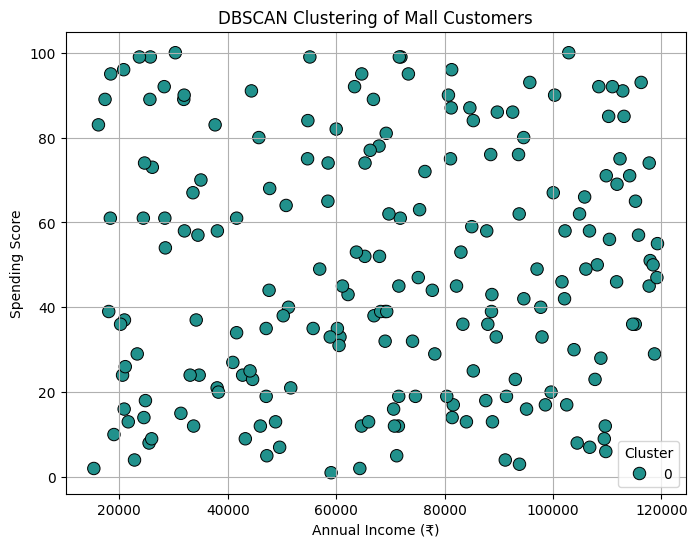

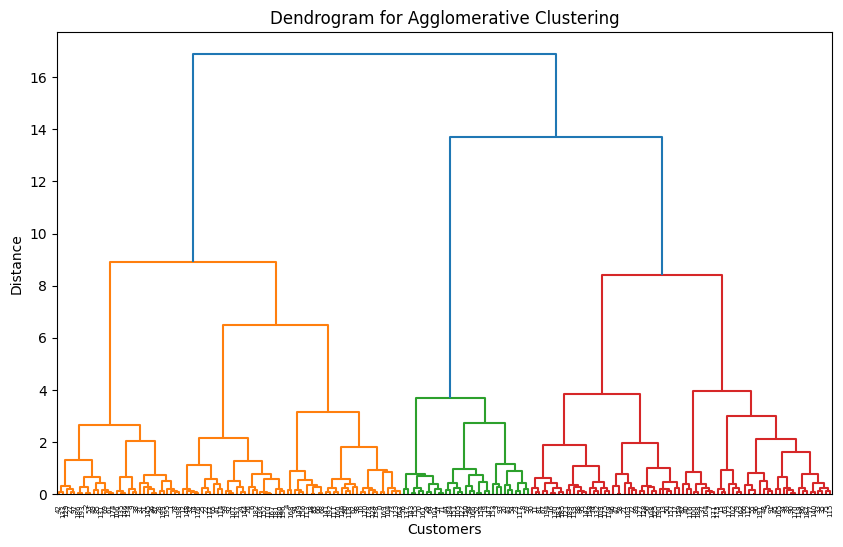

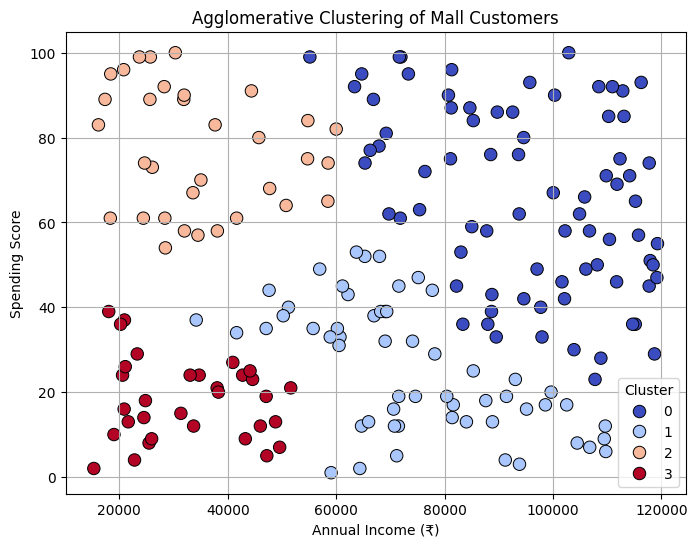

In [67]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# ---- (1) Generate Random Customer Data ----
np.random.seed(42)
num_samples = 200

# Generate synthetic dataset
customers = np.arange(1, num_samples + 1)
genres = np.random.choice([0, 1], num_samples)  # 0 = Male, 1 = Female
ages = np.random.randint(18, 70, num_samples)
annual_income = np.random.randint(15000, 120000, num_samples)  # ₹
spending_score = np.random.randint(1, 101, num_samples)  # 1-100

# Create DataFrame
df = pd.DataFrame({
    "Customer_ID": customers,
    "Genre": genres,
    "Age": ages,
    "Annual_Income": annual_income,
    "Spending_Score": spending_score
})

# ---- (2) Normalize Data ----
X = df[["Annual_Income", "Spending_Score"]].values  # Use 2 features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- (3) Apply DBSCAN Clustering ----
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

# ---- (4) Visualize DBSCAN Clusters ----
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual_Income"], y=df["Spending_Score"],
                hue=df["DBSCAN_Cluster"], palette="viridis", edgecolor="k", s=80)
plt.title("DBSCAN Clustering of Mall Customers")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# ---- (5) Apply Agglomerative Clustering ----
linked = linkage(X_scaled, method='ward')

# ---- (6) Generate Dendrogram ----
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation="top", distance_sort="ascending", show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# ---- (7) Apply Agglomerative Clustering with 4 Clusters ----
agg_clustering = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
df["Agglomerative_Cluster"] = agg_clustering.fit_predict(X_scaled)

# ---- (8) Visualize Agglomerative Clustering ----
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual_Income"], y=df["Spending_Score"],
                hue=df["Agglomerative_Cluster"], palette="coolwarm", edgecolor="k", s=80)
plt.title("Agglomerative Clustering of Mall Customers")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
